#**Análisis exploratorio de datos - Venta de Carros**




##**Importación de Librerías**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

##**Lectura de datos**

In [23]:
df = pd.read_csv("sample_data/cars.csv")
df.head(20) 
# df.teil() --> ultimas filas 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


##**Primera Parte - Consulta de Datos**

In [4]:
df.shape

(4345, 9)

In [5]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [6]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [7]:
df.nunique()

Brand             7
Price           906
Body              6
Mileage         410
EngineV          73
Engine Type       4
Registration      2
Year             39
Model           312
dtype: int64

In [8]:
df['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


##**Segunda parte - Limpieza de datos**

In [10]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [29]:
df['Price'] =  df['Price'].replace({"NaN": 19418.746935})
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [30]:
df['EngineV'] =  df['EngineV'].replace({"NaN": 2.790734})
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


##**Tercera parte - Correlación de variables**

In [31]:
corrl = df.corr()
corrl

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


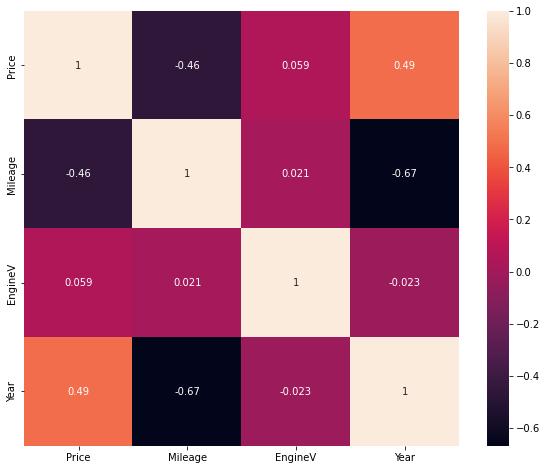

In [32]:
f , ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrl , square = True, annot = True, yticklabels=corrl.columns, xticklabels=corrl.columns,cbar=True)

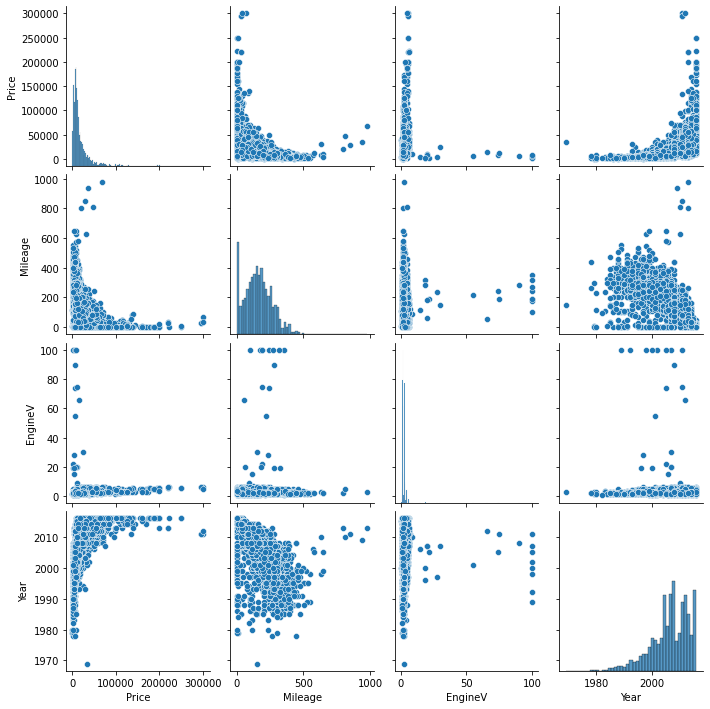

In [33]:
sns.pairplot(df)

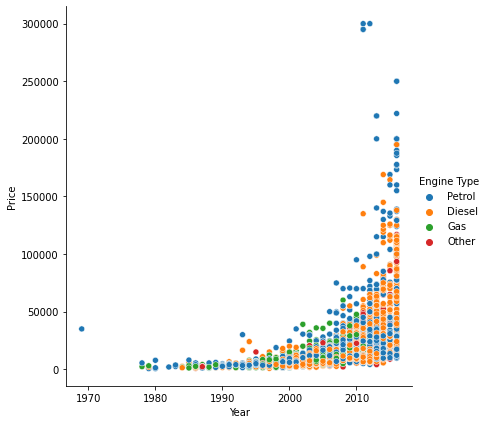

In [34]:
fig = sns.relplot(x='Year', y='Price', data= df, hue='Engine Type', height = 6)
plt.show()

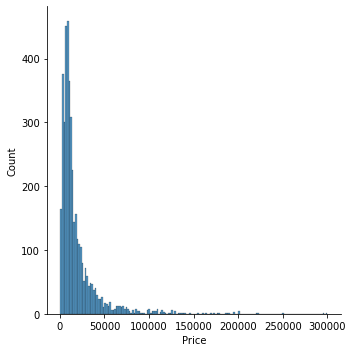

In [14]:
sns.displot(df['Price'])
# plt.xlim(0,10)

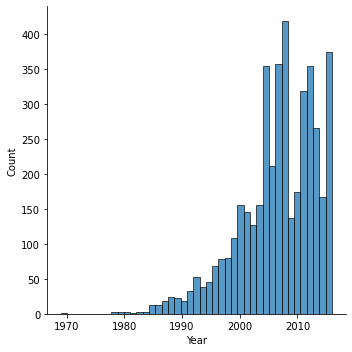

In [26]:
sns.displot(df['Year'])

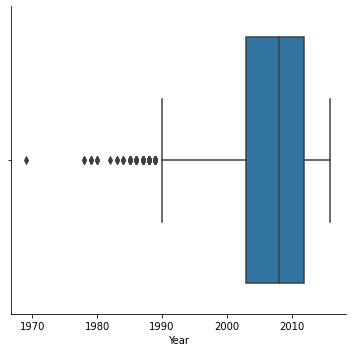

In [28]:
sns.catplot(x='Year', data = df, kind = 'box')

In [21]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


##**Creación de un nuevo DataSet**

In [ ]:
data = pd.concat([df['Brand'],df['Price']], axis = 1)
data.head()

,Brand,Price
0,BMW,4200.0
1,Mercedes-Benz,7900.0
2,Mercedes-Benz,13300.0
3,Audi,23000.0
4,Toyota,18300.0


##**Gráfica de distribución de Precios por Marca**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio')

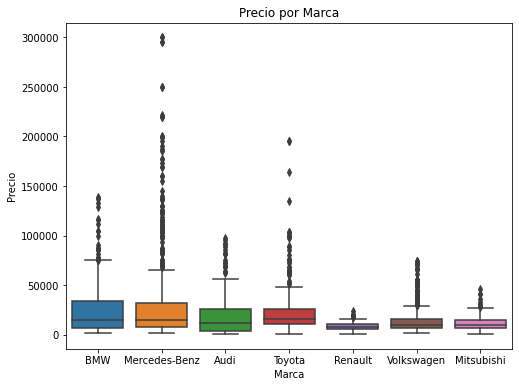

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot('Brand','Price', data = df, palette='tab10')
plt.title('Precio por Marca')
plt.xlabel('Marca')
plt.ylabel('Precio')

Text(0, 0.5, 'Precio')

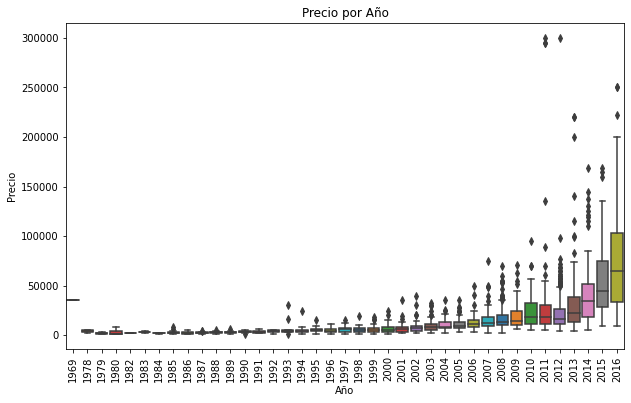

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x='Year',y='Price', data = df, palette='tab10')
plt.xticks(rotation = 90)
plt.title('Precio por Año')
plt.xlabel('Año')
plt.ylabel('Precio')

Text(0, 0.5, 'Precio')

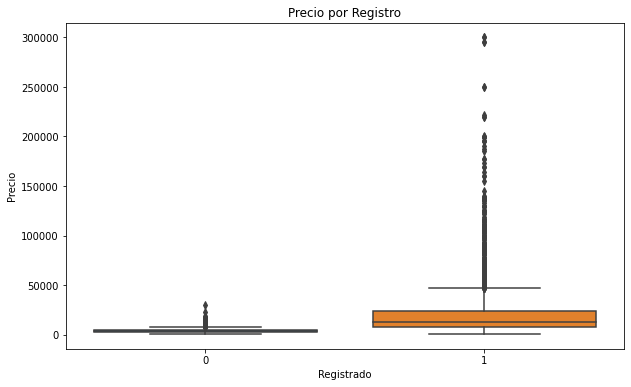

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.boxplot(x='Registration',y='Price', data = df, palette='tab10')
plt.title('Precio por Registro')
plt.xlabel('Registrado')
plt.ylabel('Precio')